### Modularity clustering
This code follows from Mark Newman 2006 (publications) 

We start with some basic imports:

In [1]:
import numpy as np
import scipy as sp 
import matplotlib.pyplot as plt

Next, create a matrix with two random communities for testing purposes:

In [2]:
def rand_community(n, m, pn = 0.75, pm = 0.75, pnm = 0.25):
    mat = np.zeros((n + m, n + m))
    for i in range(0, n):
        for j in range(0, n):
            mat[i, j] = 1 if np.random.random_sample() < pn else 0
    for i in range(n, n + m):
        for j in range(n, n + m):
            mat[i, j] = 1 if np.random.random_sample() < pm else 0
    for i in range(0, n):
        for j in range(n, n + m):
            mat[i, j] = 1 if np.random.random_sample() < pnm else 0
    for i in range(n, n + m):
        for j in range(0, n):
            mat[i, j] = 1 if np.random.random_sample() < pnm else 0
    return mat


In [3]:
adj = rand_community(10, 5)

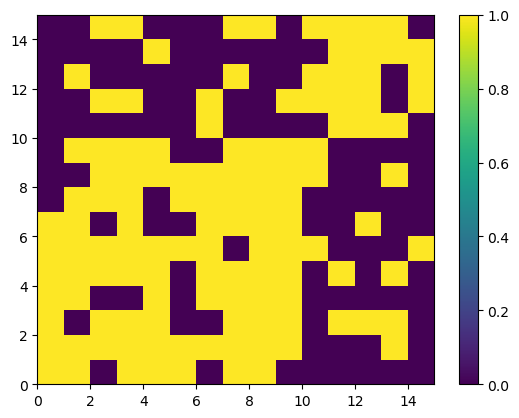

In [4]:
plt.pcolormesh(adj)
plt.colorbar()

## Now we try to implement the code in the paper (2006a). 

First calculate the modularity matrix:

In [5]:
def calculate_modularity_mat(adj): 
    # initialize matrix
    n = np.shape(adj)[0]
    mod_mat = np.zeros((n, n))

    # calculate total edges in matrix:
    m = np.sum(adj) / 2
    deg = np.zeros(n)
    for i in range(n):
        deg[i] = np.sum(adj[i, :])
    
    for i in range(n):
        for j in range(n):
            mod_mat[i, j] = adj[i, j] - (deg[i] * deg[j]) / (2 * m)
    
    return mod_mat

In [ ]:
mod_mat = calculate_modularity_mat(adj)

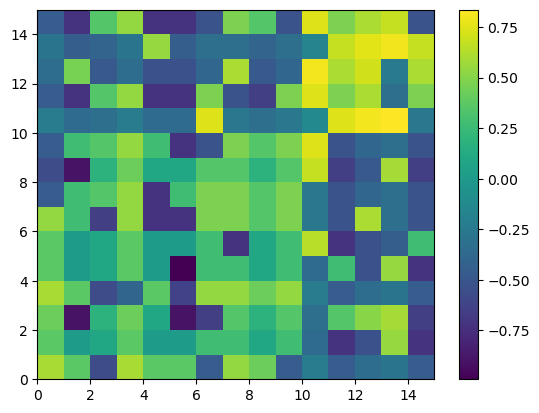

In [7]:
plt.pcolormesh(mod_mat)
plt.colorbar()

In [8]:
ews, evs = np.linalg.eig(mod_mat)

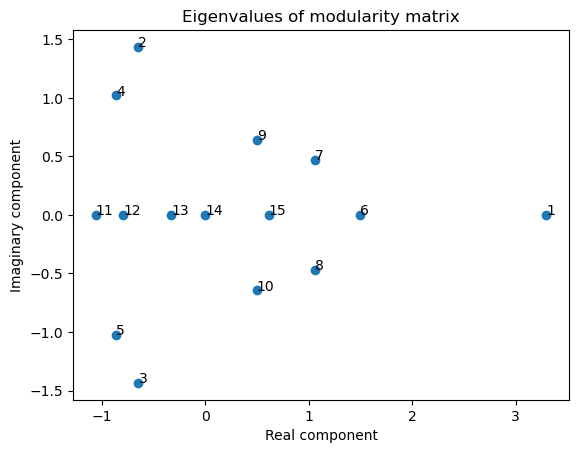

In [9]:
# plot eigenvalues of modularity matrix
fig, ax = plt.subplots()
ax.scatter(ews.real, ews.imag)
ax.set_title("Eigenvalues of modularity matrix")
ax.set_xlabel("Real component")
ax.set_ylabel("Imaginary component")

# optional: label each eigenvalue (sorted from largest magnitude to smallest)
n = np.size(ews)
for i in range(n):
    ax.annotate(i + 1, (ews[i].real, ews[i].imag))

In [10]:
# get signs of largest eigenvector
s = np.zeros(n)
for i in range(n):
    s[i] = 1 if evs[0, i] > 0 else -1
s

array([-1.,  1.,  1.,  1.,  1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1.,  1.])

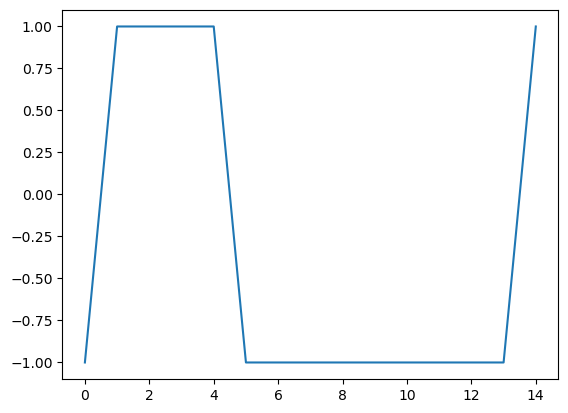

In [11]:
plt.plot(s)

In [12]:
evs[0]

array([-0.3488355 +0.j        ,  0.02752996+0.29697954j,
        0.02752996-0.29697954j,  0.09458653+0.1341473j ,
        0.09458653-0.1341473j , -0.42113917+0.j        ,
       -0.14445269+0.11462242j, -0.14445269-0.11462242j,
       -0.03849899-0.01264501j, -0.03849899+0.01264501j,
       -0.34967269+0.j        , -0.0040455 +0.j        ,
       -0.00054348+0.j        , -0.25819889+0.j        ,
        0.08224824+0.j        ])